In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u 

# load constants
c = 3e8            # speed of light m/s
hp = 6.626e-27     # planck's constant erg s
H_0 = 100.         # hubble's constant /h km/s/Mpc
h = 0.73

In [7]:
#  how does the emissivity vary with temperature?  Can we trust that the variation of emissivity for H-alpha is similar 
#  to that of Ly-alpha?

def Halpha():
    ## Number density /cm^3.  Load values that agree with H-alpha emission at redshift 0
    ## Emissivity erg/s/cm^3. Took ly-alpha emis (since didn't calculate H-alpha) 
    ## and used the energy fraction from Table B1 to approximate the emis of H-alpha

  #  n_H = 4*10**-5.7         # taken as a popular density from the density map of Fig 4 B&S 2010   log(rho/rhom)~1.3

    n_Harray = 4*10**-7 * 10**np.arange(0,4.1,0.1)   # number density ranging from 4*10^-7 to 4*10^-4

    # Box:      dot-dash,  dash  ,  solid  , white/dotted
    # Size:     1 Mpc   , 0.5Mpc , 0.15Mpc , 0.5Mpc
    # log Temp: 5 - 6 K , 4 - 5 K, 3 - 4 K ,  5 K   
    # emis:     -24.3   , -23.0  ,-23 - -23.5, -23.5 , 
    # density:  2.0     , 1.5    , 3.5     , 2.0-2.5
    densityfactor = np.array([2.0,1.5,3.5,2.5])
    n_Hplot = 4*10**-7 * 10**densityfactor  # dot-dash, dash, solid, white/dotted ; AVERAGE within the boxes
    emiscoeff = np.array([-24.3,-23.0,-23.,-23.3])  
    emis_plot = 0.66/11.26 * np.array([10**emiscoeff[0]*n_Hplot[0]**2,
                                       10**emiscoeff[1]*n_Hplot[1]**2,
                                       10**emiscoeff[2]*n_Hplot[2]**2,
                                       10**emiscoeff[3]*n_Hplot[3]**2])
    
    z = 0                    # redshift
    wavlen = 656.3e-9        # wavlength of line m  Which line should I use?  What fraction is "energy"? --> ergs, so use Halpha 
    
    L_plot = np.array([1.,0.5,0.15,0.5])   # dot-dash, dash, solid
    vol_plot = L_plot**3
    
    print('Doing H-alpha...')
    # return:  emissivity, redshift, wavelength, length scale, volume
    return [z,wavlen,emiscoeff,n_Harray,emis_plot,L_plot,vol_plot, densityfactor]


In [8]:
# Call the function with the constants we want, now we want to load the H-alpha values.
z,wavlen,emiscoeff,n_Harray,emis_plot,L_plot,vol_plot,densityfactor = Halpha()

# cosmic mean density
rho_mean = 5.1*10**-6*((1+z)/3)**3

# calculate the luminosity and angular diameter distances (equation from cosmology notes, for EdS universe)
if z == 0: 
    DL = 15. #Mpc
    DA = 15.
else:
    DL = 2*c*h*10**-3/H_0 * (1.+z) * (1. - 1/np.sqrt(1.+z))  # Mpc
    DA = 2*c*h*10**-3/H_0 / (1.+z) * (1. - 1/np.sqrt(1.+z))  # Mpc

# approx angular size of the emitter (use to calculate the surface brightness)
solidangle_plot = L_plot/DA**2

Doing H-alpha...


In [9]:
print emis_plot
print L_plot
print vol_plot

[  4.70029946e-35   9.37833037e-35   9.37833037e-31   4.70029946e-33]
[ 1.    0.5   0.15  0.5 ]
[ 1.        0.125     0.003375  0.125   ]


[    3.8283098      1.90962057  1718.65851305    95.70774508]


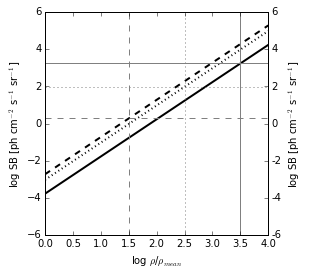

In [10]:
emis1 = 0.66/11.26 * 10**emiscoeff[2] * n_Harray**2
emis2 = 0.66/11.26 * 10**emiscoeff[1] * n_Harray**2
emis3 = 0.66/11.26 * 10**emiscoeff[0] * n_Harray**2
emis4 = 0.66/11.26 * 10**emiscoeff[3] * n_Harray**2

SB_plot1 = emis1 * vol_plot[2] / (4.*np.pi*DL**2) * wavlen * (1+z)/(hp*c) * 3.1e24 / solidangle_plot[2]
SB_plot2 = emis2 * vol_plot[1] / (4.*np.pi*DL**2) * wavlen * (1+z)/(hp*c) * 3.1e24 / solidangle_plot[1]
SB_plot3 = emis3 * vol_plot[0] / (4.*np.pi*DL**2) * wavlen * (1+z)/(hp*c) * 3.1e24 / solidangle_plot[0]
SB_plot4 = emis4 * vol_plot[3] / (4.*np.pi*DL**2) * wavlen * (1+z)/(hp*c) * 3.1e24 / solidangle_plot[3]

# Plot the SB as a function of the density n_H
fig, ax1 = plt.subplots(figsize=(4,4))
ax1.set_xlabel(r'log $\rho$/$\rho_{mean}$')
ax1.set_ylabel('log SB [ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
#ax1.legend(loc=4)
#ax1.get_legend()

ax1.plot(np.arange(0,4.1,0.1),np.log10(SB_plot1),'k-',linewidth=2)                          # logT ~ 3
ax1.plot(np.arange(0,4.1,0.1),np.log10(SB_plot2),'k--',linewidth=2)        # logT ~ 3
#ax1.plot(np.arange(0,4.1,0.1),np.log10(SB_plot3),'k:',linewidth=2)                          # logT ~ 6
ax1.plot(np.arange(0,4.1,0.1),np.log10(SB_plot4),'k:',linewidth=2)                          # logT ~ 6

#plot vertical and horizontal lines to indicate actual SB and density
SB_plot = emis_plot * vol_plot / (4.*np.pi*DL**2) * wavlen * (1+z)/(hp*c) * 3.1e24 / solidangle_plot
print(SB_plot)
plt.plot([0.,4.0],np.log10([SB_plot[2],SB_plot[2]]),'k-',linewidth=1,color='gray')
plt.plot([0.,4.0],np.log10([SB_plot[1],SB_plot[1]]),'k--',linewidth=1,color='gray')
#plt.plot([0.,4.0],np.log10([SB_plot[0],SB_plot[0]]),'k:',linewidth=1,color='gray')
plt.plot([0.,4.0],np.log10([SB_plot[3],SB_plot[3]]),'k:',linewidth=1,color='gray')
plt.plot([densityfactor[2],densityfactor[2]],[-6,6],'k-',linewidth=1,color='gray')
plt.plot([densityfactor[1],densityfactor[1]],[-6,6],'k--',linewidth=1,color='gray')
#plt.plot([densityfactor[0],densityfactor[0]],[-6,6],'k:',linewidth=1,color='gray')
plt.plot([densityfactor[3],densityfactor[3]],[-6,6],'k:',linewidth=1,color='gray')

ax3 = ax1.twinx()
ax3.set_yticks([-6,-4,-2,0,2,4,6])
ax3.set_yticklabels([-6,-4,-2,0,2,4,6])
ax3.set_ylabel('log SB [ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
#convert to mag/arsec^2


plt.savefig('FigHalphaSBBoxes.pdf')